<hr>

#### => _The Spark Fountation- Data Science And Business Analytics Internship_

#### => _Task 3 - EXPLORATORY DATA ANALYSIS_

#### => _**Task By : Manish Ghoshal**_

<hr>

# **Step 1 : Importing Libraries and Loading Dataset**


In [66]:
#Importing All The Requried Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Loading DataSet From The Source Link

df=pd.read_csv("/Users/manishghoshal/Downloads/SampleSuperstore.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [59]:
# Check if there any null value in the Dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Exploring The Data : 

In [60]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [61]:
df.shape

(9994, 13)

In [68]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [72]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [73]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

# **Step 2 : Exploratory Data Analysis**

### Heatmap for Correlation

<AxesSubplot:>

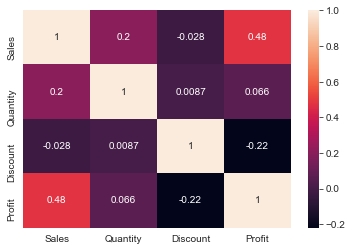

In [80]:
corr = df.corr()
sns.heatmap(corr,annot=True)

### From above Heatmap:

 - Sales and Profit are Moderately Correlated
 - Discount and Profit are Negatively Correlated
 - Quantity and Profit are less Moderately Correlated

In [82]:
#Dropping Postal Code Columns :
df = df.drop(['Postal Code'],axis = 1)    

# **Step 3: Analysis Using Pairplot Of Each Column**

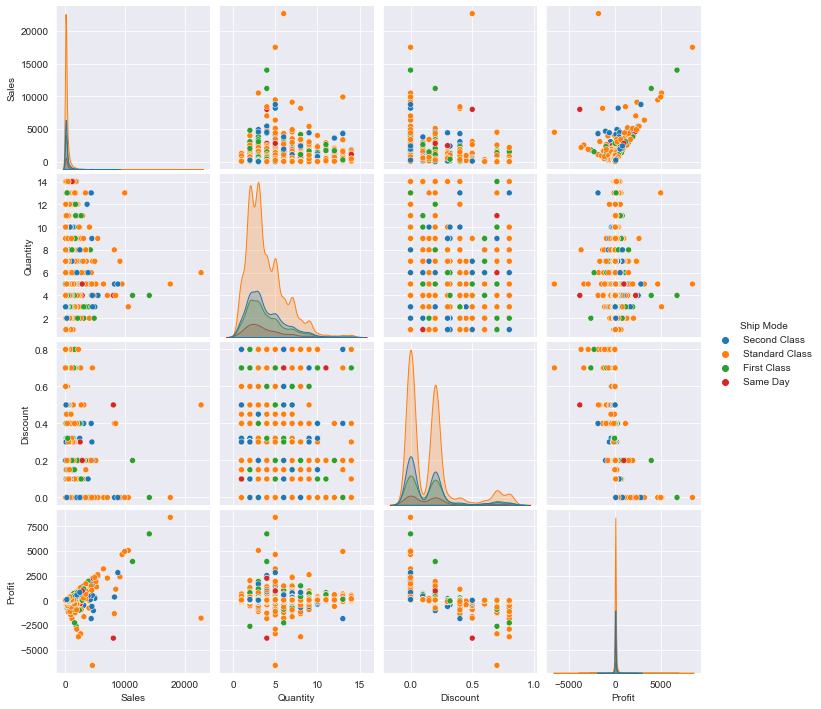

In [83]:
sns.pairplot(df, hue = 'Ship Mode')

In [84]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

## [1] Based on the Catagory :

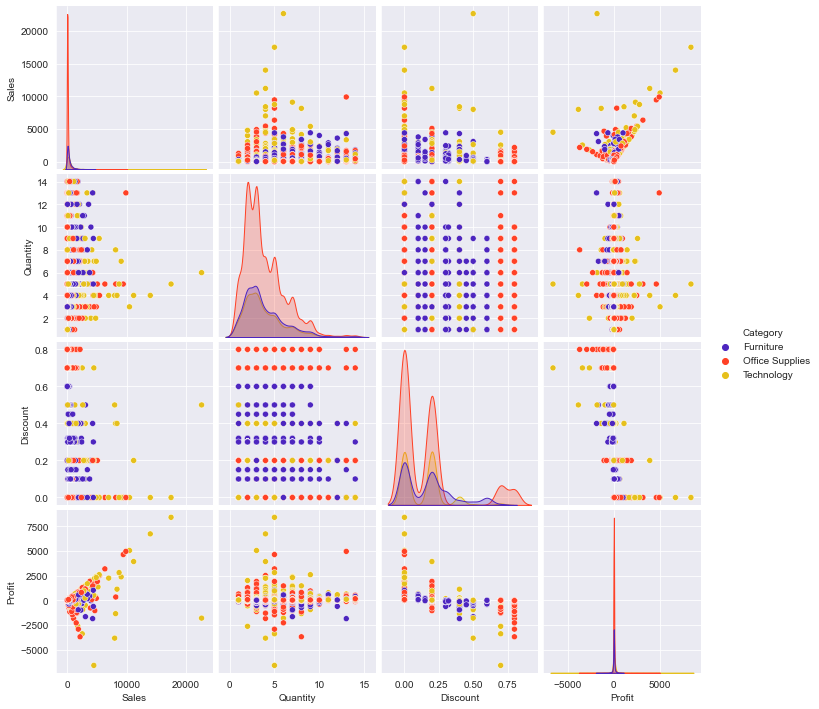

In [109]:
sns.pairplot(df,hue='Category', palette = "CMRmap" )

## [2] Based on Region:

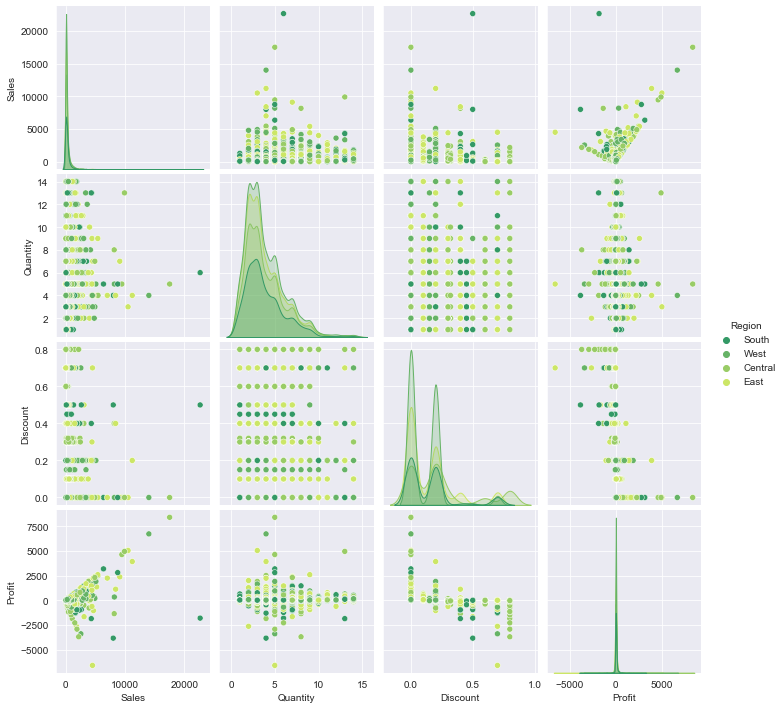

In [120]:
sns.pairplot(df,hue='Region', palette = "summer")

## [3] Based on the Segment:

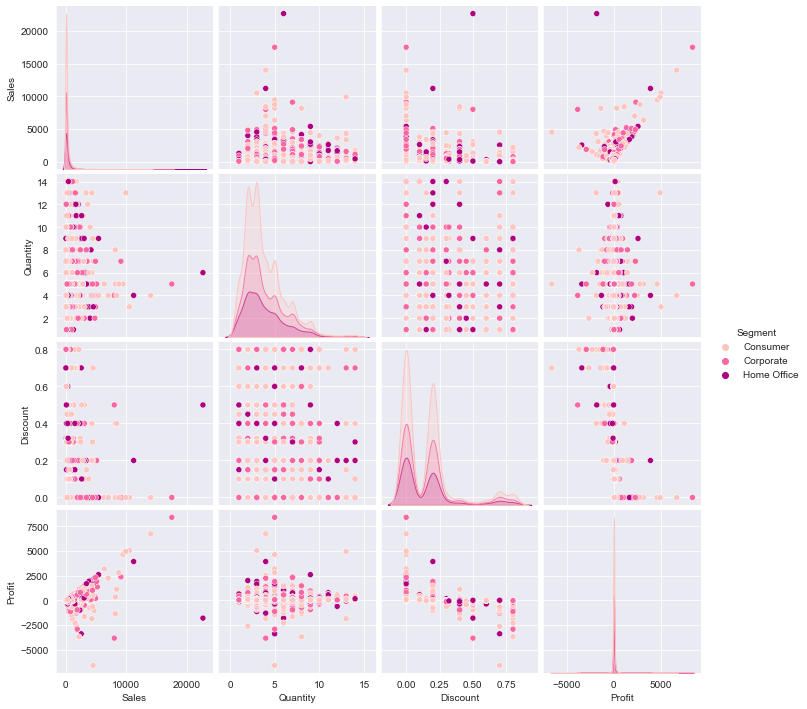

In [119]:
sns.pairplot(df,hue = 'Segment', palette = 'RdPu')

# **Step 4 : Count Plot Of Each Column**

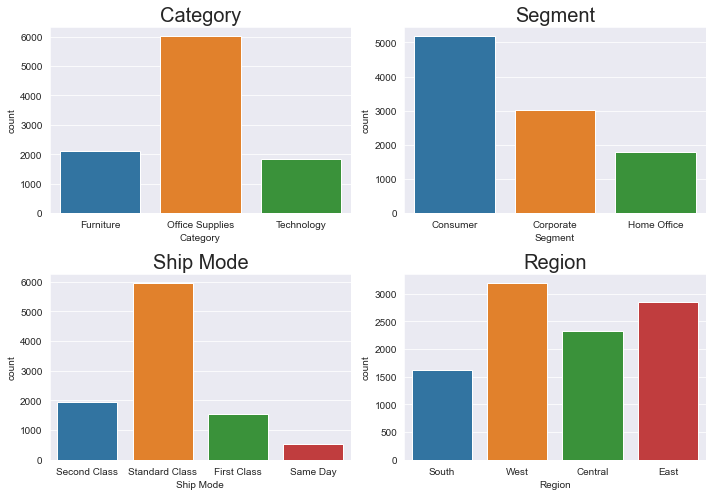

In [121]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

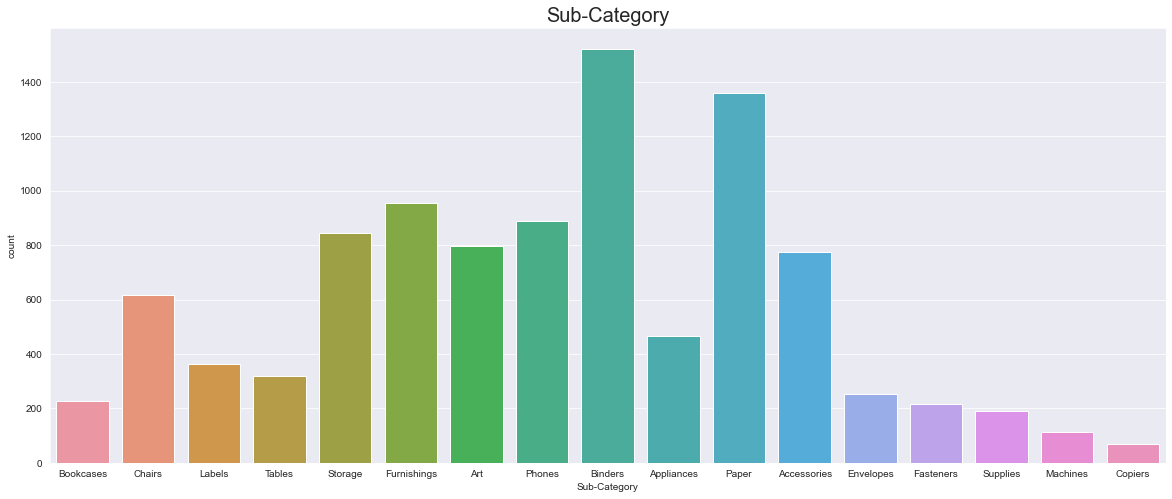

In [122]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

Text(0.5, 1.0, 'State')

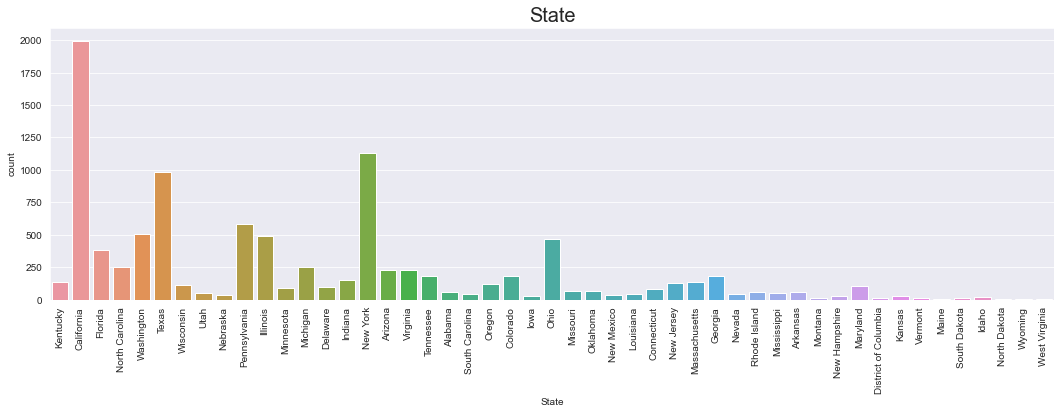

In [123]:
plt.figure(figsize=(18,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

Text(0.5, 1.0, 'Quantity')

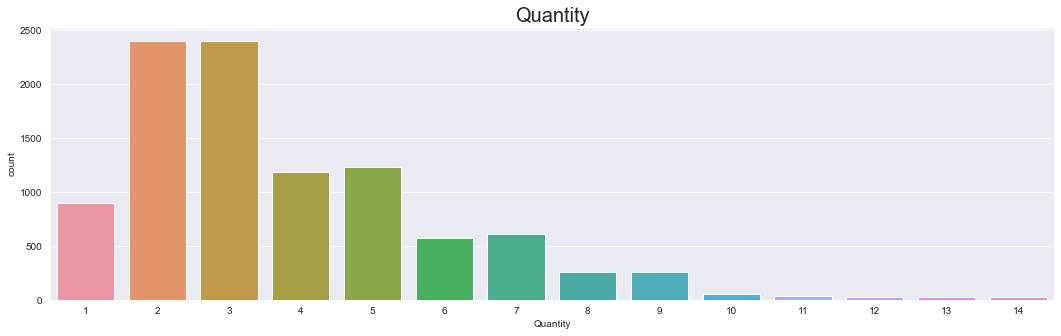

In [124]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

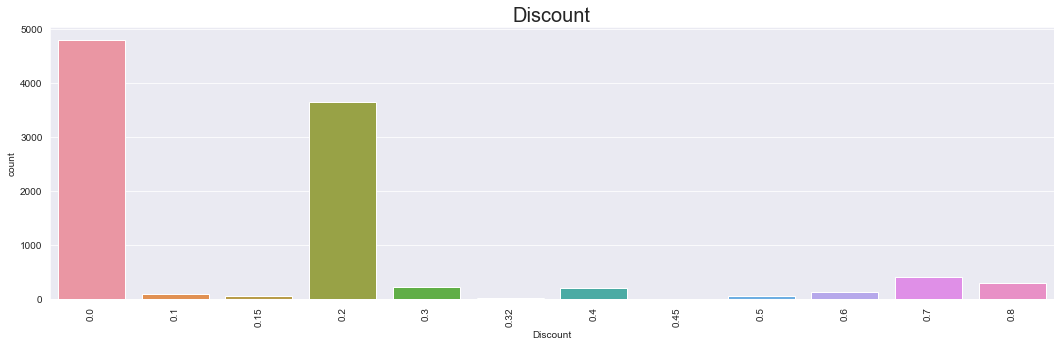

In [125]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

# **Step 5 : Distribution Of The Data Using The Plot**

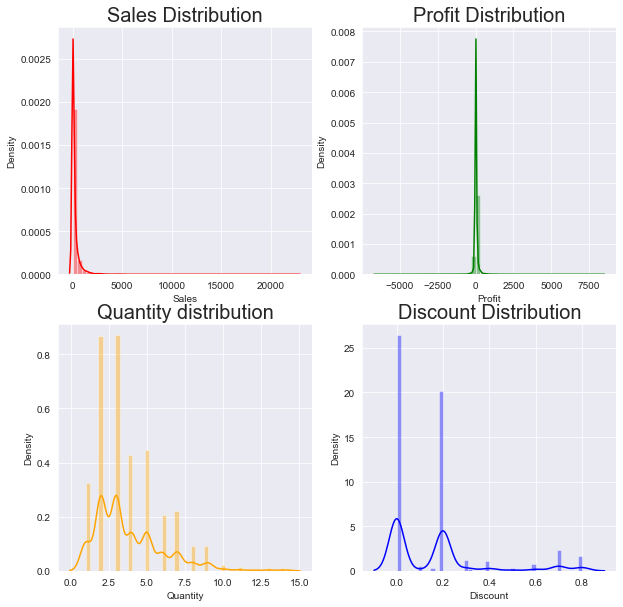

In [126]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

## Statewise Deal Analysis

In [127]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [128]:
df1 = df['State'].value_counts()
df1.head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

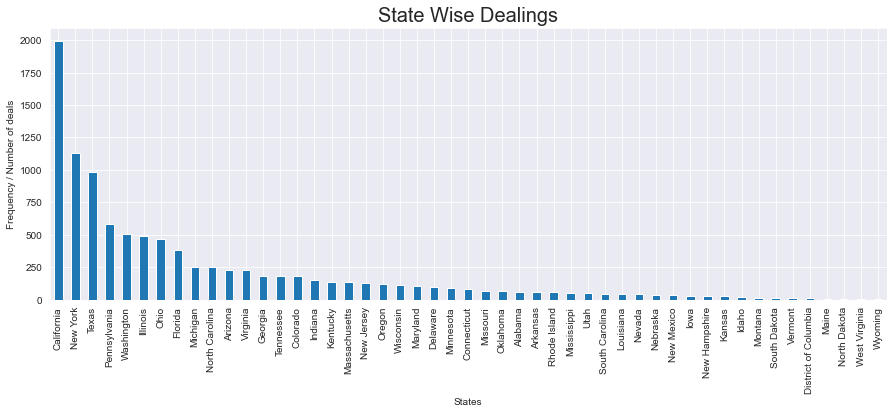

In [129]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

### **Here is top 3 state where deals are Highest**
 
#### 1. Califonia
#### 2.New York
#### 3.Texas

**Wyoming: Lowest Number Of Deals**

In [130]:
df['State'].value_counts().mean()

203.6122448979592

#### Average number of deals per state is 204

## City Wise analysis of the dealing


In [131]:
df2 = df['City'].value_counts()
df2=df2.head(50)

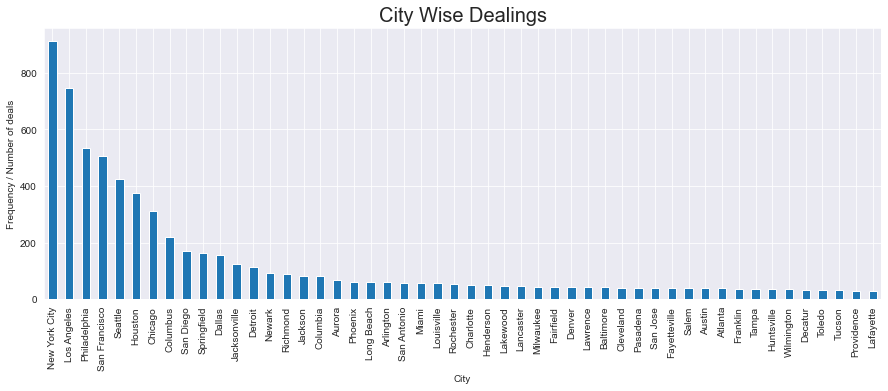

In [132]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

### **Here is top 3 city where deals are Higher**
1. New York City
2. Los Angeles
3. Philadelphia

In [133]:
df['City'].value_counts().mean()

18.789077212806028

#### Average number of deal per city is 19

## Segment wise analysis of Profit, Discount and sell

In [134]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [135]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.969279,0.158308,25.855188
Corporate,234.185781,0.158159,30.499164
Home Office,241.311234,0.147178,33.883643


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

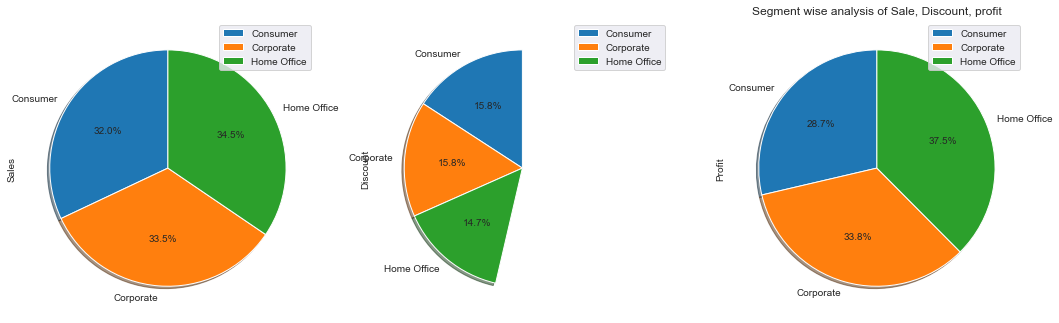

In [136]:
#1. Sales 
#2. Discount 
#3. Profit

df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # Starting at 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

### **Sales :**

 - Consumer : 32%
 - Corporate - 33.5%
 - Home Office : 34.5%

### **Discount :**

 - Consumer : 15.8%
 - Corporate : 15.8%
 - Home Office : 14.7%

### **Profit :**

 - Consumer : 15.8%
 - Corporate : 15.8%
 - Home Office : 14.7%



## Statewise analysis of Profit Discount and Sell

In [137]:
df['State'].value_counts().head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

In [138]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


### [1] Statewise Profit Analysis

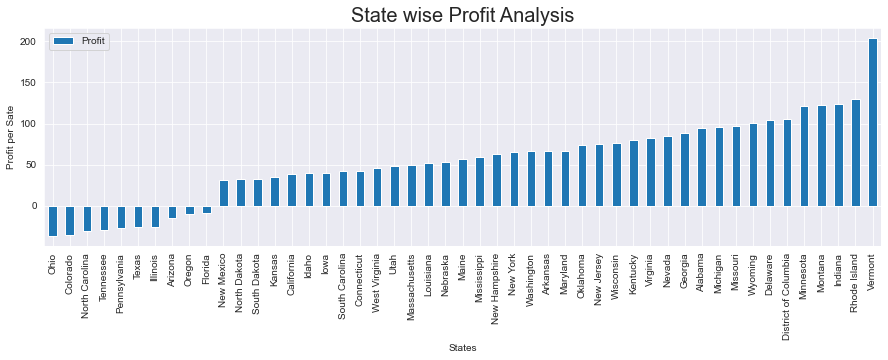

In [139]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

### RESULT

 - Vermont: Highest Profit

 - Ohio: Lowest Profit


### [2] Statewise Sale Analysis

Text(0.5, 1.0, 'State wise analysis of Sale')

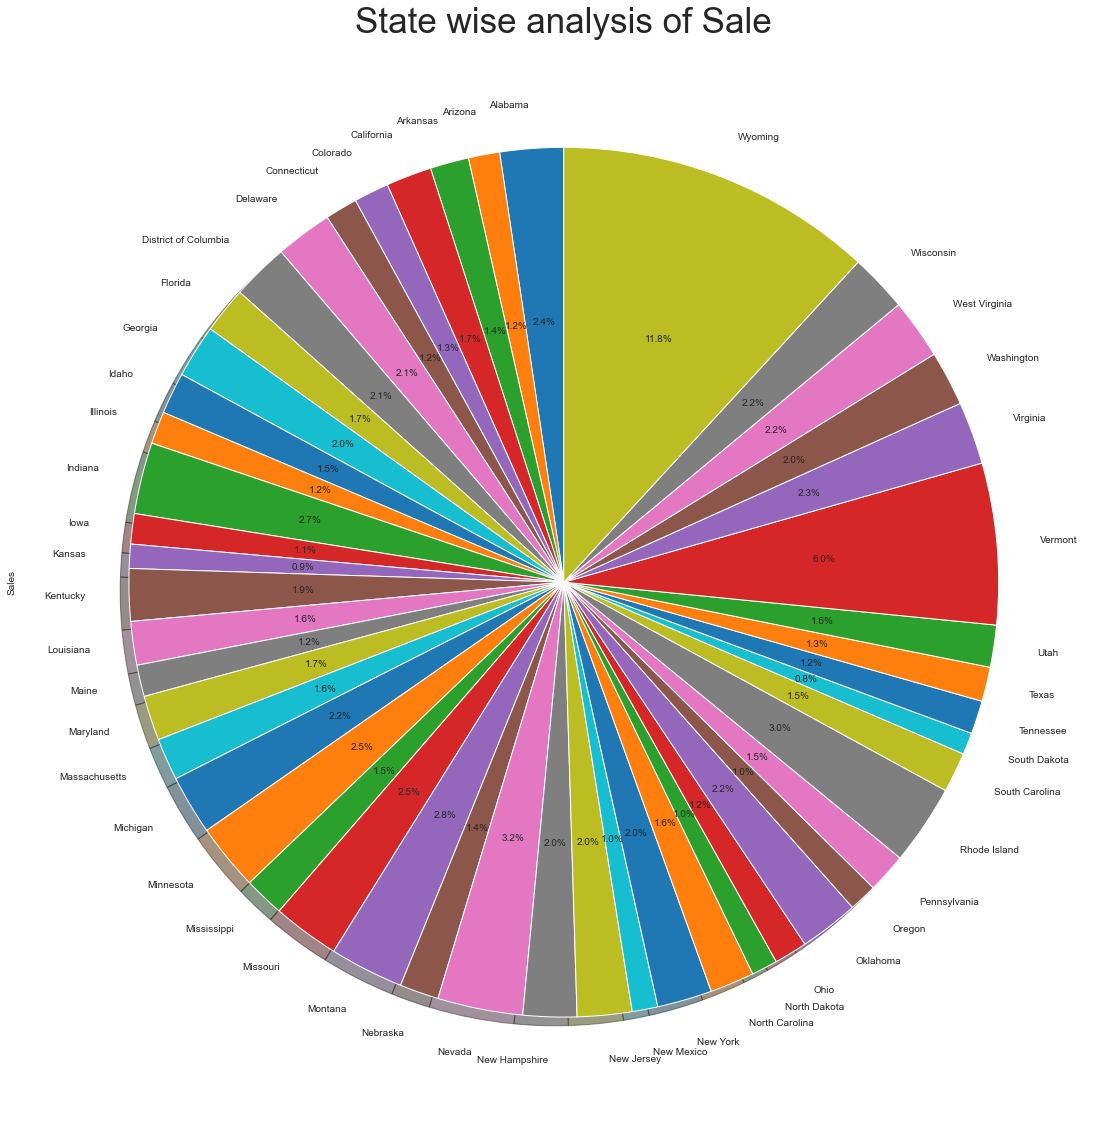

In [182]:
df_state['Sales'].plot(kind='pie',figsize = (20,20),autopct='%1.1f%%',startangle=90, shadow=True)                        
plt.title('State wise analysis of Sale',fontsize=35)

#### - Highest amount of sales = Wyoming(11.8%)
#### - Lowest amount of sales = South Dakota(0.8%)


### [3] Statewise Discount Analysis

Text(0.5, 1.0, 'State wise analysis of Discount')

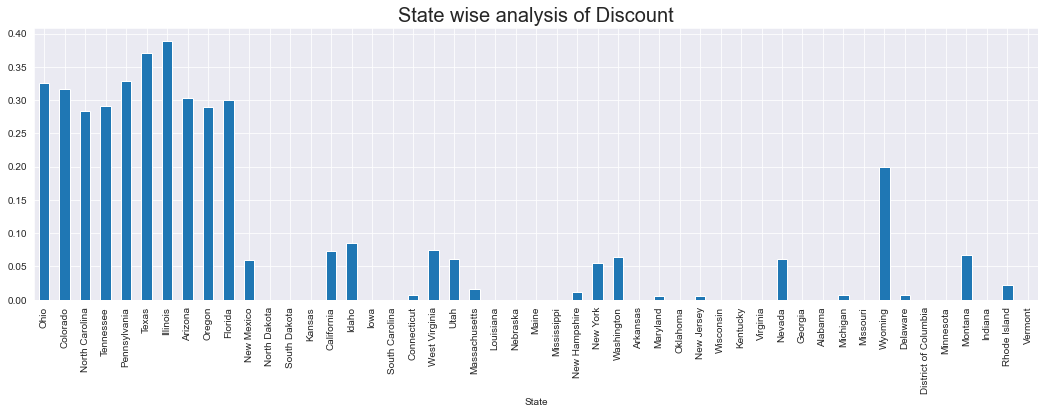

In [160]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)

#### Illinois at the top

## Citywise Analysis of the Profit :

In [161]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

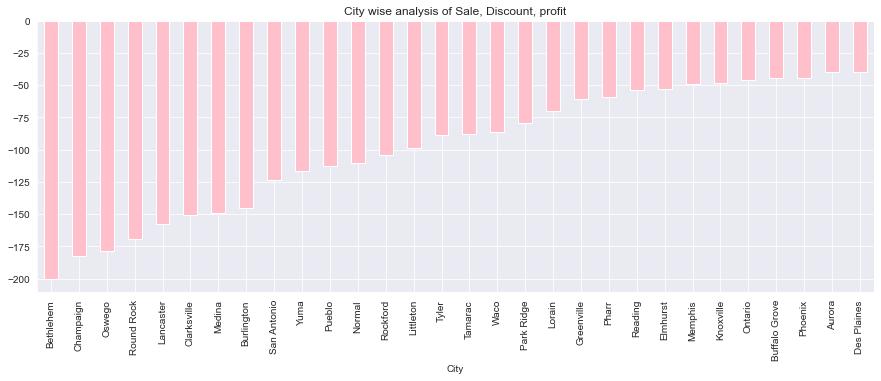

In [162]:
#1.Low Profit

df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

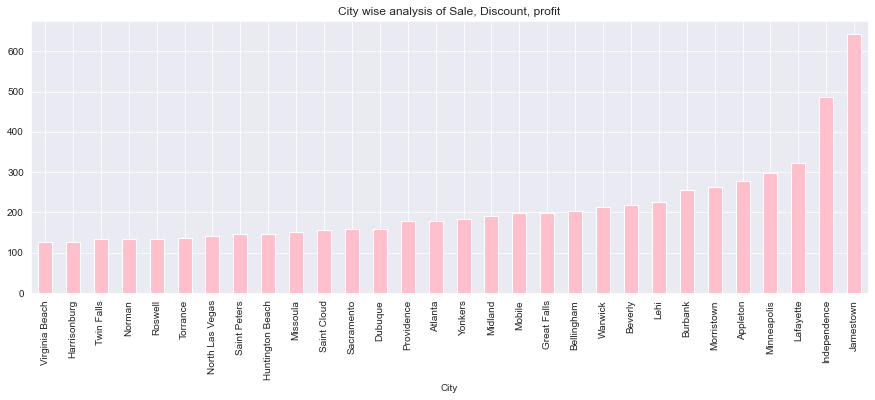

In [163]:
#2. High Profit

df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

##### 30 CITIES WHICH HAS PROFIT IN POSITIVE
##### 30 CITIES WHICH HAS PROFIT IN NEGATIVE
##### THE BALANCE IS PRETTY GOOD HERE!

## QUANTITY WISE SALES, PROFIT AND DISCOUNT ANALYSIS

In [164]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.377982,0.154844,16.027769
3,175.630896,0.153321,23.720306
4,272.779827,0.158373,37.227971
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

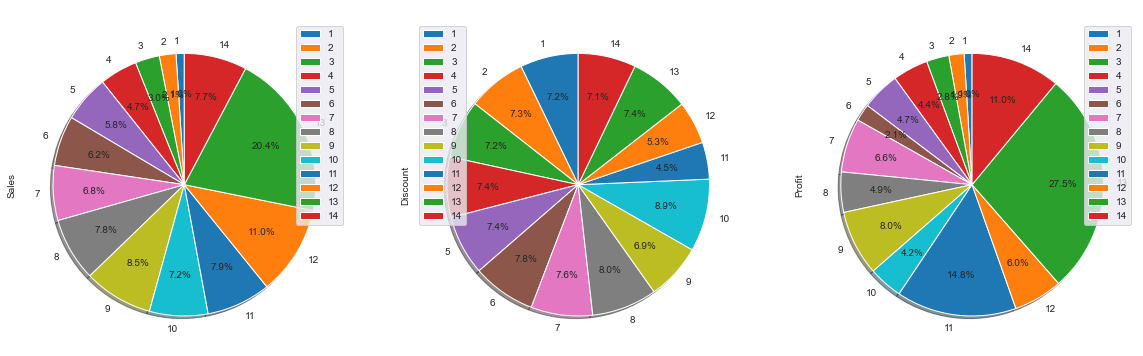

In [166]:
#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit', color = "white")

#### 13 Number of Quantity is high for sales and Profit

## CATAGORY WISE SALES DISCOUNT AND PROFIT :

In [167]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,350.002981,0.174027,8.697740
Office Supplies,119.550107,0.157385,20.353403
Technology,452.709276,0.132323,78.752002


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

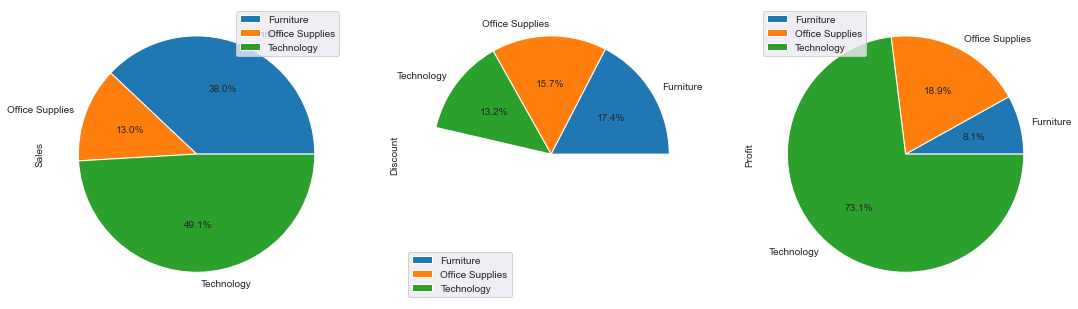

In [168]:
df_category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)

#### - Maximun sales and Profit obtain in Technology
#### - Minimun profit obtain in Furniture

## Sub-Category wise Sales, Profit and Discount :

In [169]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.096896,0.074969,8.207059
Binders,133.645972,0.372011,19.860710
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.971969,0.170244,43.198582
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


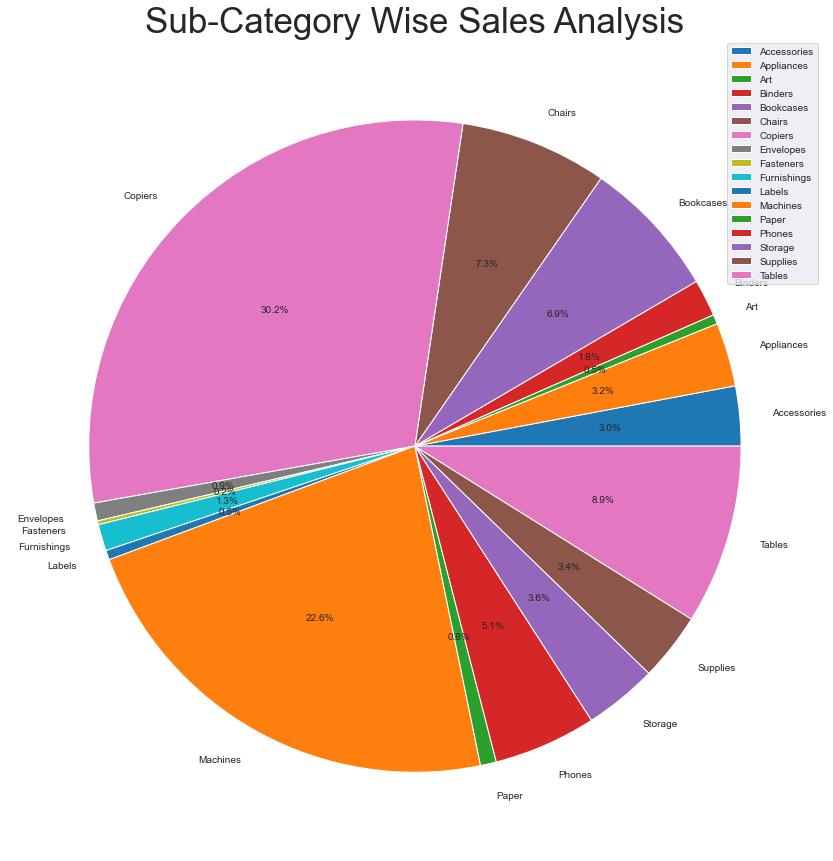

In [183]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Sales'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 35)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

#### Copier, then Machine have High sales

## [2] BASED ON THE DISCOUNT :

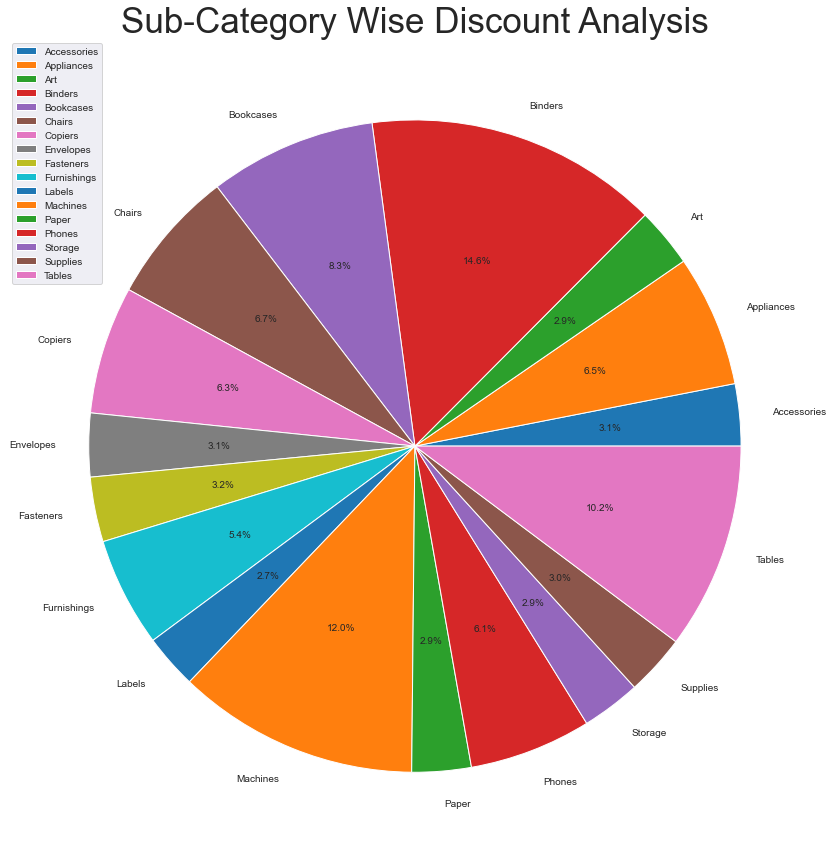

In [184]:
plt.figure(figsize = (15,15))
plt.pie(df_sub_category['Discount'], labels = df_sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 35)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

#### **Binders , Machines and then tables have high Discount**

## [3] BASED ON THE PROFIT

<AxesSubplot:xlabel='Sub-Category'>

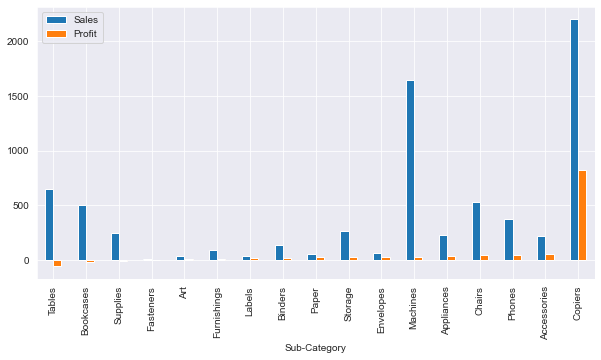

In [173]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])

#### **COPIER : HIGHEST PROFIT AS WELL AS SELL**

## REGION WISE ANALYSIS :


In [174]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.947759,0.240250,17.100421
East,238.465798,0.145343,32.163905
South,241.803645,0.147253,28.857673
West,227.139254,0.109615,33.927281


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

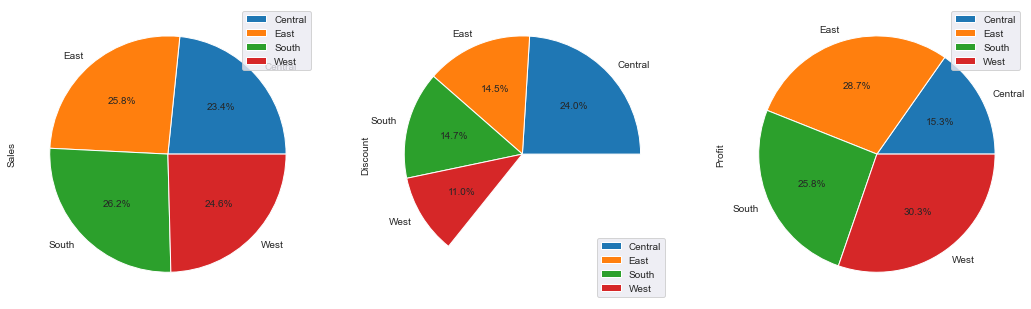

In [175]:
df_region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_region.index)

#### **WEST : PROFIT IS HIGH**

## SHIP MODE WISE ANALYSIS  :

In [177]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [179]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

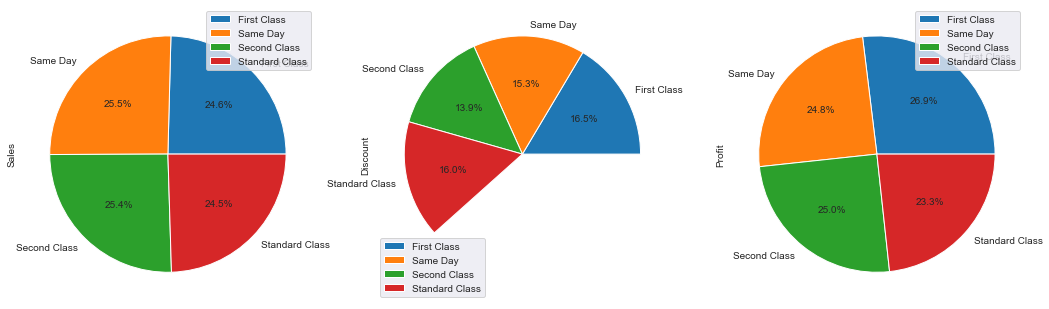

In [180]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

#### - Profit and Discount is high in First Class
#### - Sales is high for Same day ship

# **Step 6 : RESULT AND CONCLUSION**

#### - Profit is more than that of sale but there are some areas where profit could be increased
#### - Profit and Discount is high in First Class
#### - Sales is high for Same day ship
#### - Sub-category: Copier: High Profit & sales
#### - Sub-category: Binders , Machines and then tables have high Discount
#### - Category: Maximun sales and Profit obtain in Technology
#### - Category: Minimun profit obtain in Furniture
#### - State: Vermont: Highest Profit
#### - State: Ohio: Lowest Profit
#### - Segment: Home-office: High Profit & sales
#### - Here is top 3 city where deals are Highest

 ####     1. New York City
 ####     2. Los Angeles
 ####     3. Philadelphia
 
#### - Sales and Profit are Moderately Correlated
#### - Quantity and Profit are less Moderately Correlated
#### - Discount and Profit are Negatively Correlated
#### - Here is top 3 state where deals are Highest

 ####     1. California
 ####     2. New York
 ####     3. Texas
 
####  - **Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming(11.8%)**

####  - Lowest amount of sales= **South Dakota(0.8%)**

In [181]:
print("************* END *************")

************* END *************
